In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
df = pd.read_csv('LoanStats_2016Q1.csv', engine = 'python', skipinitialspace=True, skiprows = 1)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,34000.0,34000.0,34000.0,60 months,15.31%,814.41,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12200.0,12200.0,12200.0,60 months,11.47%,268.13,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000.0,10000.0,10000.0,36 months,11.47%,329.62,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,21000.0,21000.0,21000.0,36 months,11.47%,692.20,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,35000.0,35000.0,35000.0,60 months,21.18%,950.42,E,E3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [5]:
#Checking null values in the dataset
df.isnull().sum()

id                                            133887
member_id                                     133889
loan_amnt                                          2
funded_amnt                                        2
funded_amnt_inv                                    2
term                                               2
int_rate                                           2
installment                                        2
grade                                              2
sub_grade                                          2
emp_title                                       8983
emp_length                                      8946
home_ownership                                     2
annual_inc                                         2
verification_status                                2
issue_d                                            2
loan_status                                        2
pymnt_plan                                         2
url                                           

In [6]:
df.shape

(133889, 145)

In [29]:
df.zip_code

0         140xx
1         773xx
2         913xx
3         481xx
4         871xx
5         206xx
6         478xx
7         581xx
8         325xx
9         761xx
10        743xx
11        871xx
12        100xx
13        952xx
14        551xx
15        850xx
16        211xx
17        900xx
18        656xx
19        851xx
20        334xx
21        740xx
22        299xx
23        760xx
24        370xx
25        330xx
26        945xx
27        554xx
28        300xx
29        326xx
          ...  
133859    075xx
133860    430xx
133861    623xx
133862    906xx
133863    198xx
133864    119xx
133865    472xx
133866    328xx
133867    941xx
133868    291xx
133869    925xx
133870    331xx
133871    228xx
133872    551xx
133873    292xx
133874    622xx
133875    672xx
133876    751xx
133877    104xx
133878    302xx
133879    293xx
133880    554xx
133881    926xx
133882    600xx
133883    432xx
133884    531xx
133885    212xx
133886    201xx
133887     None
133888     None
Name: zip_code, Length: 

In [25]:
# loc_df = pd.DataFrame()
# from pyzipcode import ZipCodeDatabase
# zcdb = ZipCodeDatabase() 

In [28]:
# for index, rows in df.iterrows():
#     val = rows['zip_code']
#     zipcode = zcdb[val]
#     loc_df['longitude'] = zipcode.longitude
#     loc_df['latitude'] = zipcode.latitude

IndexError: Couldn't find ZIP

In [9]:
df_select = df[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'home_ownership'
              , 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose','zip_code'
              , 'addr_state']]

In [10]:
df_select.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state
0,34000.0,60 months,15.31%,814.41,C,MORTGAGE,150000.0,Source Verified,Mar-2016,Current,n,debt_consolidation,140xx,NY
1,12200.0,60 months,11.47%,268.13,B,RENT,90000.0,Verified,Mar-2016,Current,n,debt_consolidation,773xx,TX
2,10000.0,36 months,11.47%,329.62,B,RENT,35000.0,Source Verified,Mar-2016,Current,n,other,913xx,CA
3,21000.0,36 months,11.47%,692.20,B,MORTGAGE,175000.0,Not Verified,Mar-2016,Current,n,home_improvement,481xx,MI
4,35000.0,60 months,21.18%,950.42,E,MORTGAGE,195000.0,Verified,Mar-2016,Fully Paid,n,debt_consolidation,871xx,NM


In [9]:
df_select.shape

(133889, 16)

In [11]:
df_select.isnull().sum()

loan_amnt              2
term                   2
int_rate               2
installment            2
grade                  2
home_ownership         2
annual_inc             2
verification_status    2
issue_d                2
loan_status            2
pymnt_plan             2
purpose                2
zip_code               2
addr_state             2
dtype: int64

In [12]:
df_select = df_select.dropna()

In [13]:
df_select.shape

(133887, 14)

In [14]:
df_select.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
purpose                0
zip_code               0
addr_state             0
dtype: int64

# Basic Data Exploration 

# 1. Exploring the field "term" which indicates the number of payments on the loan. Values are in months and can be either 36 or 60.

In [15]:
df_select['term'].value_counts()

 36 months    96120
 60 months    37767
Name: term, dtype: int64

Text(0,0.5,'Frequency')

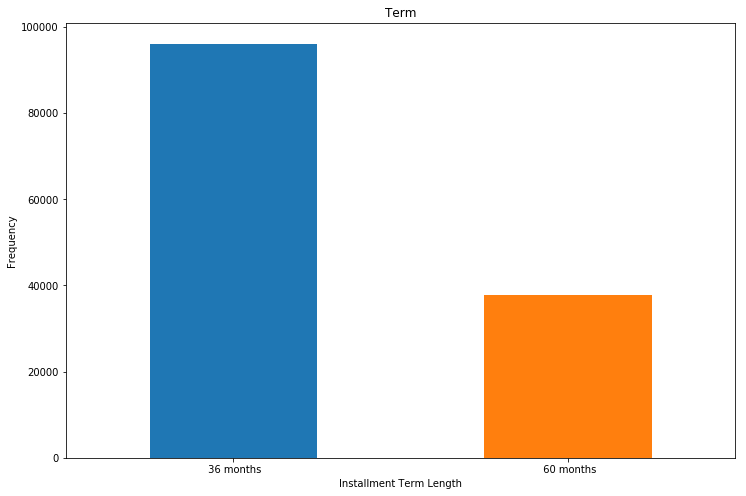

In [18]:
df_select['term'].value_counts().plot(kind='bar', rot=0, figsize = (12,8))
plt.title('Term')
plt.xlabel('Installment Term Length')
plt.ylabel('Frequency')

# 2. Loan Amount: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [19]:
df_select['loan_amnt'].describe()

count    133887.000000
mean      15589.394041
std        8858.198349
min        1000.000000
25%        8400.000000
50%       14400.000000
75%       21000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

Text(0,0.5,'Frequency')

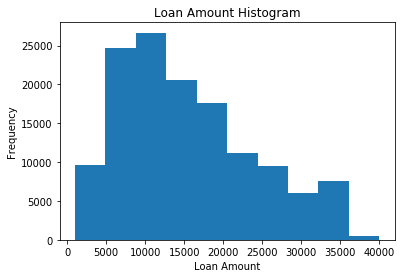

In [20]:
df_select['loan_amnt'].plot(kind='hist')
#df_select.hist(column='loan_amnt', bins=50)
plt.title('Loan Amount Histogram')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

Text(0.5,1,'Loan Amount Boxplot')

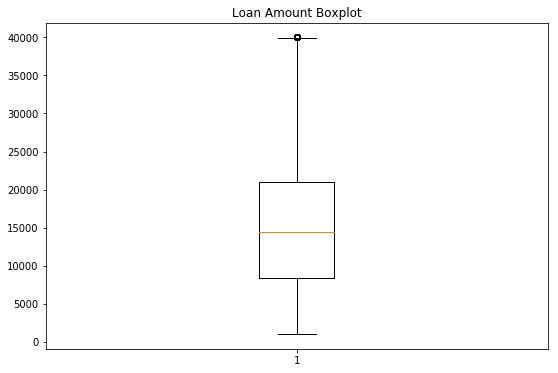

In [21]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(df_select['loan_amnt'])

plt.title('Loan Amount Boxplot')

In [22]:
df_box = df_select[['loan_amnt','installment', 'annual_inc']]

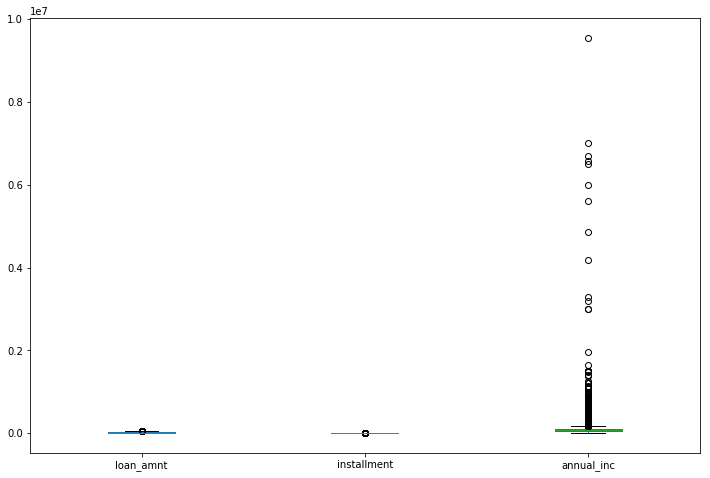

In [23]:
df_box.plot(kind = "box", figsize = (12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10caa3470>,
      dtype=object)

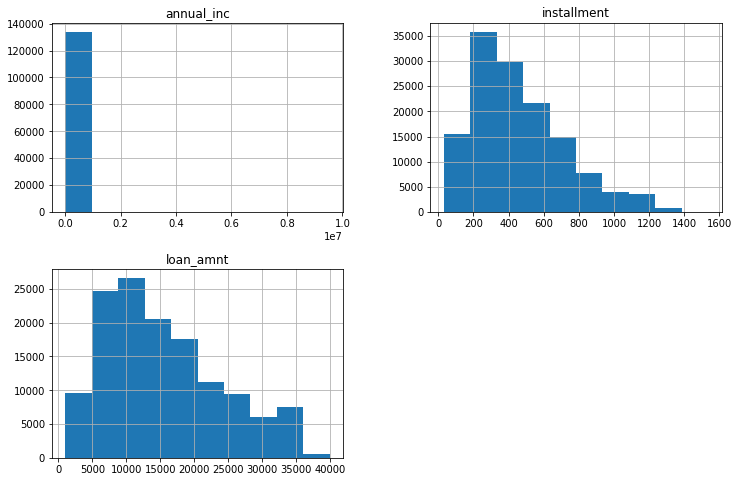

In [24]:
df_box.hist(figsize = (12,8))

# Exploring the int_rate field. However, before we do any data exploration, we need to remove the % sign from the field values

In [25]:
df_select['int_rate'] = df_select['int_rate'].str.replace('%', '')

In [26]:
df_select.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state
0,34000.0,60 months,15.31,814.41,C,MORTGAGE,150000.0,Source Verified,Mar-2016,Current,n,debt_consolidation,140xx,NY
1,12200.0,60 months,11.47,268.13,B,RENT,90000.0,Verified,Mar-2016,Current,n,debt_consolidation,773xx,TX
2,10000.0,36 months,11.47,329.62,B,RENT,35000.0,Source Verified,Mar-2016,Current,n,other,913xx,CA
3,21000.0,36 months,11.47,692.20,B,MORTGAGE,175000.0,Not Verified,Mar-2016,Current,n,home_improvement,481xx,MI
4,35000.0,60 months,21.18,950.42,E,MORTGAGE,195000.0,Verified,Mar-2016,Fully Paid,n,debt_consolidation,871xx,NM


In [27]:
df_select['int_rate'] = (df_select['int_rate']).astype(float)

Text(0.5,1,'Interest Rate Boxplot')

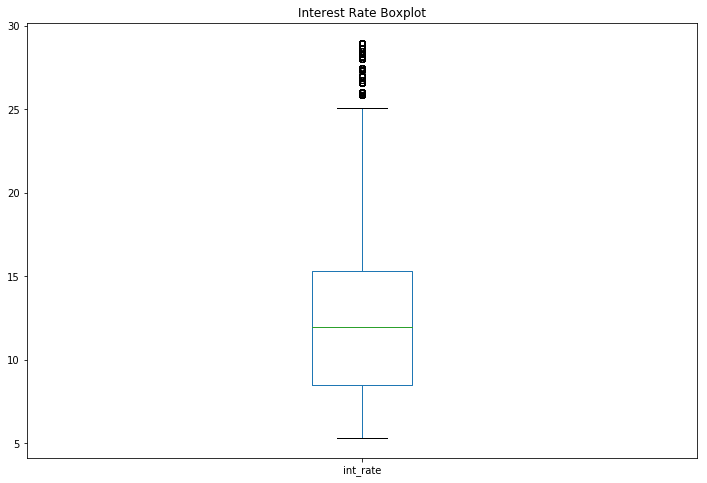

In [28]:
df_select.int_rate.plot(kind = "box", figsize = (12,8))
plt.title('Interest Rate Boxplot')

In [29]:
df_select['int_rate'].describe()

count    133887.000000
mean         12.476342
std           4.829203
min           5.320000
25%           8.490000
50%          11.990000
75%          15.310000
max          28.990000
Name: int_rate, dtype: float64

In [30]:
from scipy.stats import iqr

iqr(df_select['int_rate'])

6.82

Text(0,0.5,'Frequency')

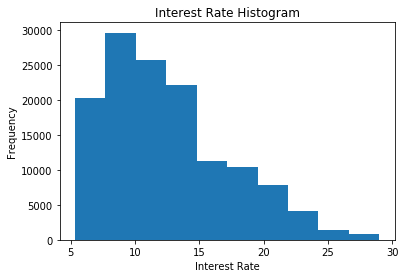

In [31]:
df_select['int_rate'].plot(kind='hist')
plt.title('Interest Rate Histogram')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')

# Exploring the categorical variable "Grade". This indicates the LC assigned loan grade.

In [33]:
df_select['grade'].value_counts()

B    40267
C    36777
A    26482
D    16454
E     9540
F     3482
G      885
Name: grade, dtype: int64

Text(0,0.5,'Frequency')

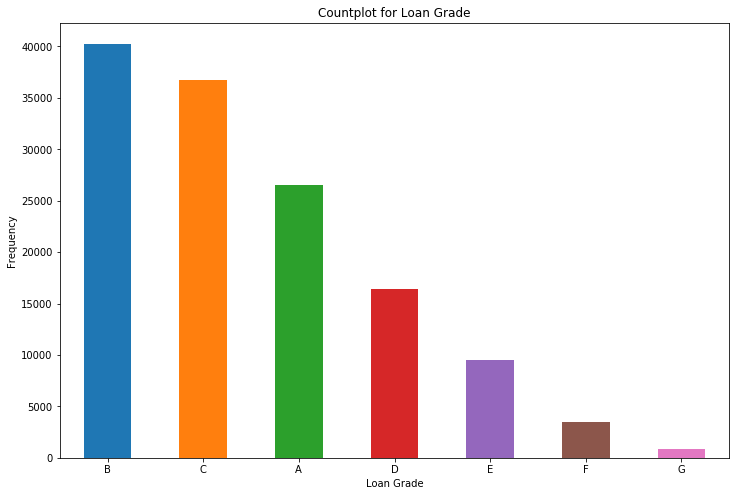

In [32]:
df_select['grade'].value_counts().plot(kind='bar', rot=0, figsize = (12,8))
plt.title('Countplot for Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Frequency')

# Exploring Home ownership. This indicates the LC assigned loan grade.

In [34]:
df_select['home_ownership'].value_counts()

MORTGAGE    66829
RENT        50864
OWN         16194
Name: home_ownership, dtype: int64

Text(0,0.5,'Frequency')

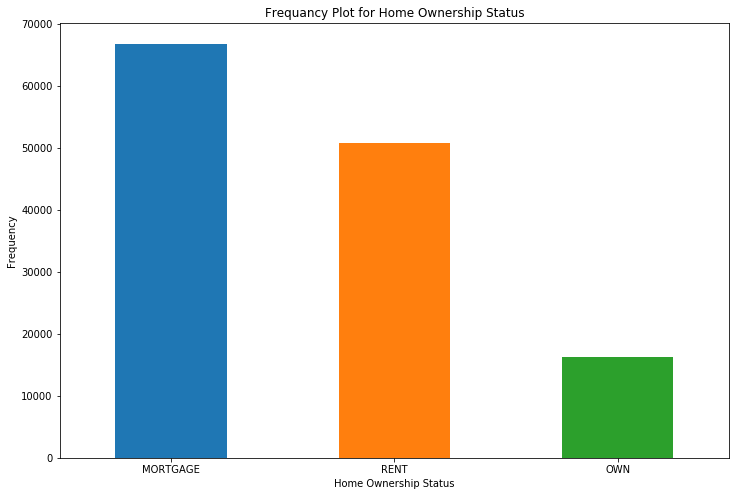

In [35]:
df_select['home_ownership'].value_counts().plot(kind='bar', rot=0, figsize = (12,8))
plt.title('Frequancy Plot for Home Ownership Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Frequency')

# Annual Income. This indicates the self-reported annual income provided by the borrower during registration.

In [39]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [40]:
df_select['annual_inc'].describe()

count   133887.000
mean        80.464
std         78.085
min          0.000
25%         49.500
50%         68.000
75%         95.008
max       9550.000
Name: annual_inc, dtype: float64

Since the above numbers are hard to interpret, I have changed the scale of annual income and divided each value by 1000.

In [37]:
#df_select['annual_inc'] = df_select['annual_inc']/1000

In [38]:
#df_select['annual_inc'].describe()

count    133887.000000
mean         80.463967
std          78.084782
min           0.000000
25%          49.500000
50%          68.000000
75%          95.008000
max        9550.000000
Name: annual_inc, dtype: float64

Text(0.5,1,'Annual Income Boxplot')

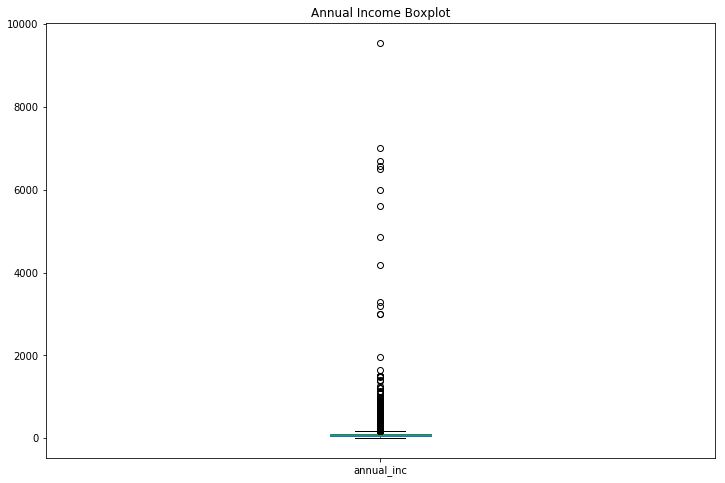

In [41]:
df_select.annual_inc.plot(kind = "box", figsize = (12,8))
plt.title('Annual Income Boxplot')

Text(0,0.5,'Frequency')

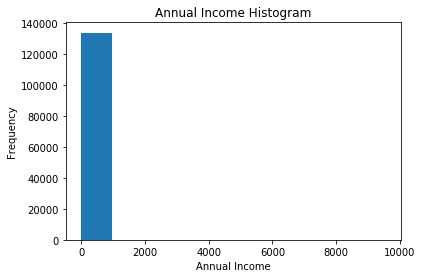

In [42]:
df_select['annual_inc'].plot(kind='hist')
plt.title('Annual Income Histogram')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Verification Status: Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified

In [43]:
df_select['verification_status'].value_counts()

Source Verified    50425
Not Verified       47100
Verified           36362
Name: verification_status, dtype: int64

Text(0,0.5,'Frequency')

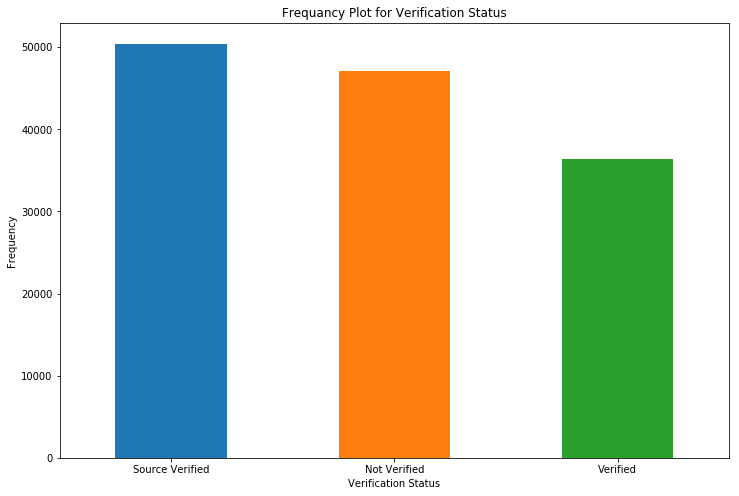

In [44]:
df_select['verification_status'].value_counts().plot(kind='bar', rot=0, figsize = (12,8))
plt.title('Frequancy Plot for Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Frequency')

# issue_d : it indicates the issue date

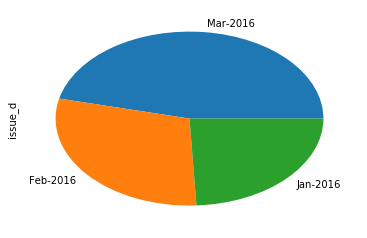

In [46]:
df_select['issue_d'].value_counts().plot(kind='pie')

In [48]:
test_series = df_select['issue_d'].value_counts()

In [49]:
test_series

Mar-2016    61992
Feb-2016    39529
Jan-2016    32366
Name: issue_d, dtype: int64

In [50]:
df_test = test_series.to_frame(name="count")

In [51]:
df_test.head()

,count
Mar-2016,61992
Feb-2016,39529
Jan-2016,32366


In [52]:
df_test['month-year'] = df_test.index

In [53]:
df_test.head()

,count,month-year
Mar-2016,61992,Mar-2016
Feb-2016,39529,Feb-2016
Jan-2016,32366,Jan-2016


In [54]:
df_test = df_test.reset_index(drop=True)

In [55]:
df_test.head()

,count,month-year
0,61992,Mar-2016
1,39529,Feb-2016
2,32366,Jan-2016


In [56]:
df_test['month-year'] = pd.to_datetime(df_test["month-year"])

In [57]:
import seaborn as sns

Text(0.5,1,'Trend of Number of Loans Per Month')

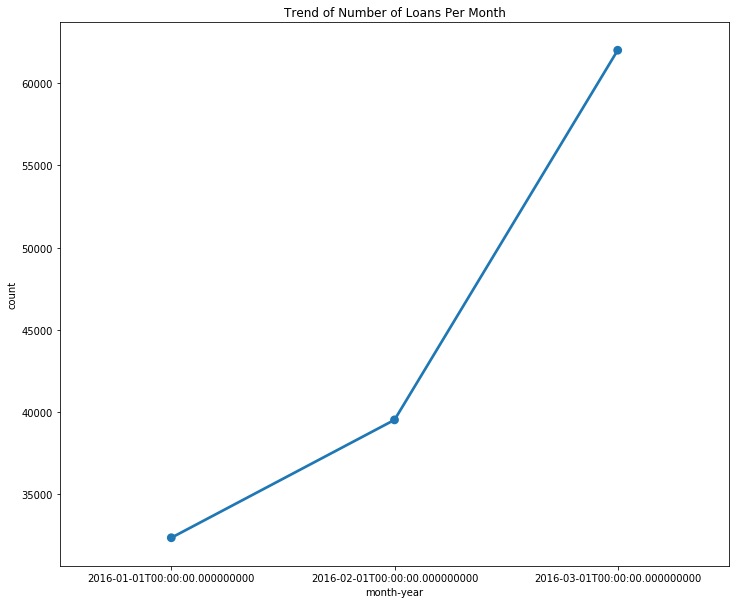

In [58]:
plt.figure(figsize=(12,10))
sns.pointplot(x = "month-year", y = "count", data = df_test)
plt.title('Trend of Number of Loans Per Month')

# Loan Status: the current status of the borrower. There are 8 different categories a borrower can be placed under which are the following: charged off, current, default, fully paid, in grace period, issued, last (16-30 days), late (31-120 days). 

In [59]:
df_select['loan_status'].value_counts()

Current               69153
Fully Paid            44434
Charged Off           16450
Late (31-120 days)     2222
In Grace Period        1229
Late (16-30 days)       395
Default                   4
Name: loan_status, dtype: int64

Text(0,0.5,'Frequency')

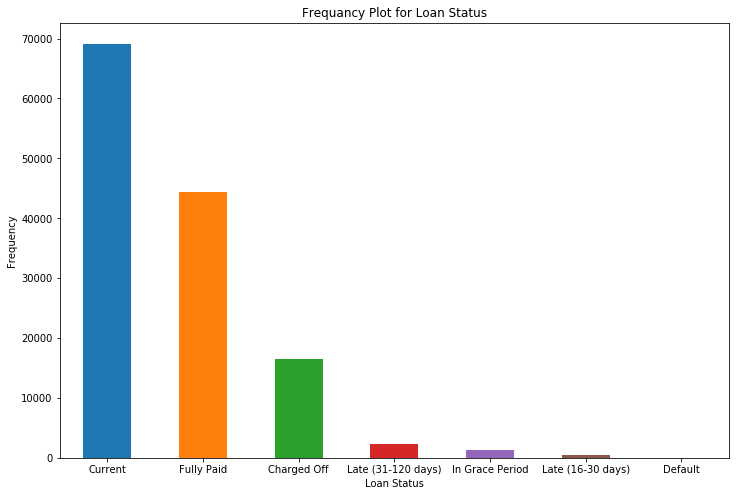

In [61]:
df_select['loan_status'].value_counts().plot(kind='bar', rot=0, figsize = (12,8))
plt.title('Frequancy Plot for Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')

Text(0.5,1,'Pie Chart for Loan Status')

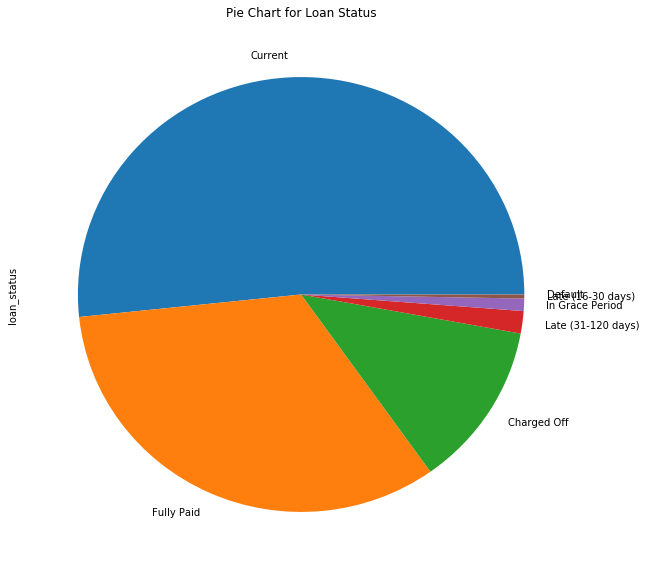

In [62]:
df_select['loan_status'].value_counts().plot(kind='pie', figsize = (10,10))
plt.title('Pie Chart for Loan Status')

# payment plan

In [63]:
df_select['pymnt_plan'].value_counts()

n    133813
y        74
Name: pymnt_plan, dtype: int64

Text(0.5,1,'Pie Chart for Payment Plan')

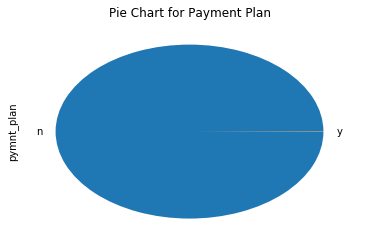

In [64]:
df_select['pymnt_plan'].value_counts().plot(kind='pie')
plt.title('Pie Chart for Payment Plan')

Text(0,0.5,'Frequency')

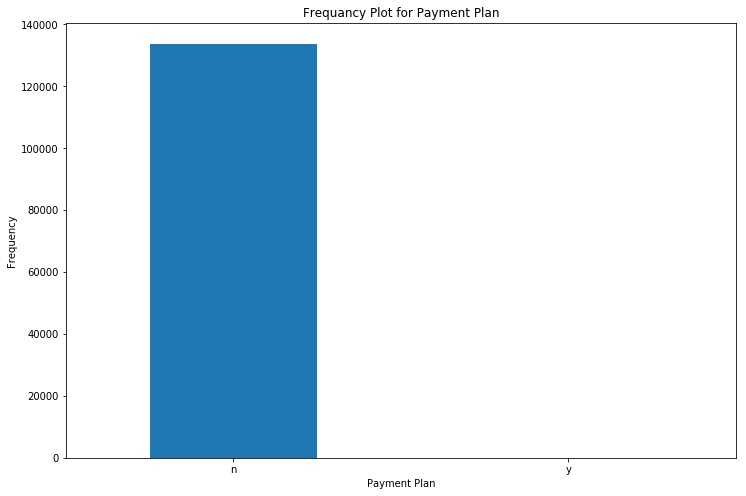

In [65]:
df_select['pymnt_plan'].value_counts().plot(kind='bar', rot=0, figsize = (12,8))
plt.title('Frequancy Plot for Payment Plan')
plt.xlabel('Payment Plan')
plt.ylabel('Frequency')

# purpose: A category provided by the borrower for the loan request. 

In [66]:
df_select['purpose'].value_counts()

debt_consolidation    76687
credit_card           32187
home_improvement       8662
other                  7132
major_purchase         2923
medical                1457
small_business         1393
car                    1306
moving                  769
vacation                743
house                   545
renewable_energy         83
Name: purpose, dtype: int64

Text(0,0.5,'Purpose')

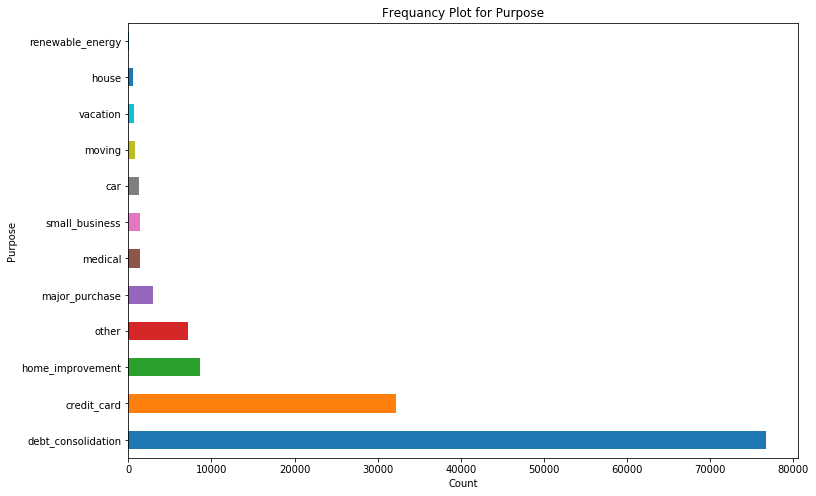

In [68]:
df_select['purpose'].value_counts().plot(kind='barh', rot=0, figsize = (12,8))
plt.title('Frequancy Plot for Purpose')
plt.xlabel('Count')
plt.ylabel('Purpose')

# addr_state

In [69]:
df_select['addr_state'].value_counts()

CA    18331
TX    11523
NY    10472
FL     9435
IL     5389
NJ     4803
OH     4601
GA     4314
PA     4211
NC     3893
VA     3707
MI     3503
AZ     3164
MA     3026
MD     2872
CO     2737
WA     2710
MN     2358
IN     2308
TN     2293
MO     2210
CT     1993
NV     1908
WI     1840
SC     1675
AL     1618
LA     1596
OR     1554
OK     1367
KY     1296
KS     1139
AR     1003
MS      884
UT      873
NM      806
NH      676
HI      641
NE      625
RI      543
ME      530
WV      450
DE      387
MT      386
ND      363
AK      353
ID      339
SD      299
WY      299
VT      298
DC      286
Name: addr_state, dtype: int64

Text(0,0.5,'Address State')

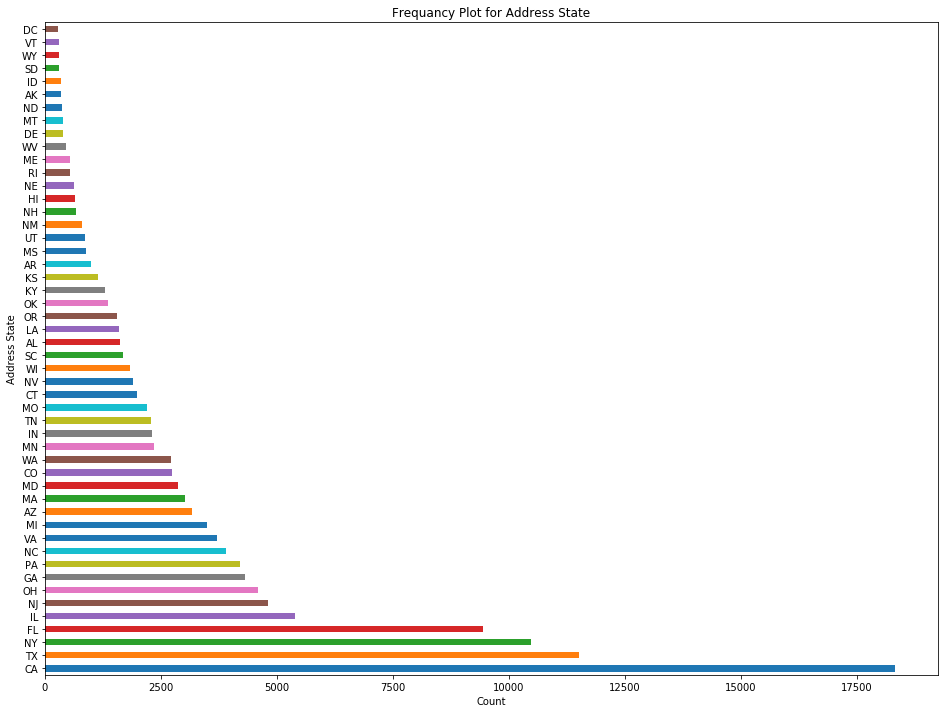

In [70]:
df_select['addr_state'].value_counts().plot(kind='barh', rot=0, figsize = (16,12))
plt.title('Frequancy Plot for Address State')
plt.xlabel('Count')
plt.ylabel('Address State')

In [71]:
import plotly
import plotly.figure_factory as ff
plotly.__version__

'2.6.0'

In [72]:
state_series = df_select['addr_state'].value_counts()
df_state = state_series.to_frame(name="count")
df_state['state'] = df_state.index
df_state = df_state.reset_index(drop=True)

In [73]:
df_state.head()

,count,state
0,18331,CA
1,11523,TX
2,10472,NY
3,9435,FL
4,5389,IL


In [74]:
df_fips = pd.read_csv("fips.csv")

In [75]:
df_merged = df_state.merge(df_fips, left_on='state', right_on='state')

In [76]:
df_merged.head()

,count,state,fips
0,18331,CA,6
1,11523,TX,48
2,10472,NY,36
3,9435,FL,12
4,5389,IL,17


In [77]:
for row in df_state:
    print (type(df_state[row][1]))

<class 'numpy.int64'>
<class 'str'>


In [78]:
scope = df_fips['state'].tolist()

In [79]:
#Find out more at https://plot.ly/python/choropleth-maps/
import plotly

plotly.offline.init_notebook_mode(connected=True)

scope = df_fips['state'].tolist()

data = [ dict(
        type = 'choropleth',
        locations = df_state['state'],
        locationmode = 'USA-states',
        z = df_state['count'],
        text = df_state['state'],
        state_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
        scope = scope,
        autocolorscale = True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Loan Counts'),
      ) ]

layout = dict(
    title = 'Number of loans by state',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='loans-us-state-map')

# Exploring relationships amaong multiple variables

# Loan status vs Loan Amount

In [80]:
import seaborn as sns

Text(0.5,1,'Loan Status vs Loan Amount')

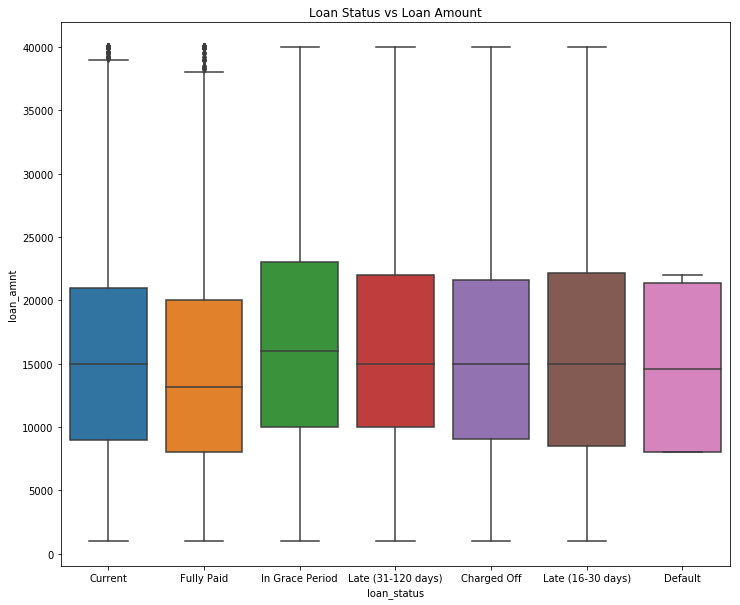

In [82]:
plt.figure(figsize=(12,10))
sns.boxplot(x="loan_status", y = "loan_amnt", data = df_select)
plt.title('Loan Status vs Loan Amount')

# Loan Amount vs Term

Text(0.5,1,'Loan Amount vs Term')

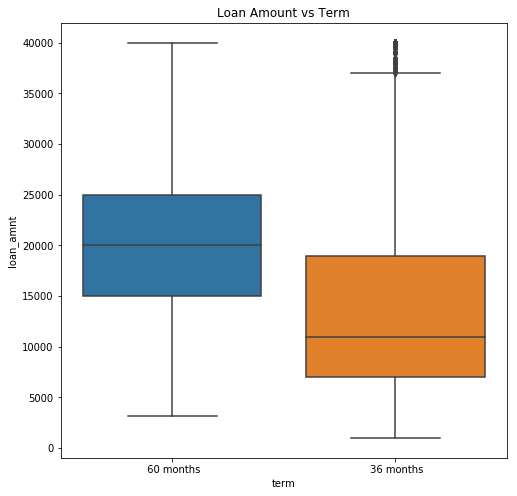

In [84]:
plt.figure(figsize=(8,8))
sns.boxplot(x="term", y = "loan_amnt", data = df_select)
plt.title('Loan Amount vs Term')

# Interest Rate vs Grade

Text(0.5,1,'Interest Rate vs Grade')

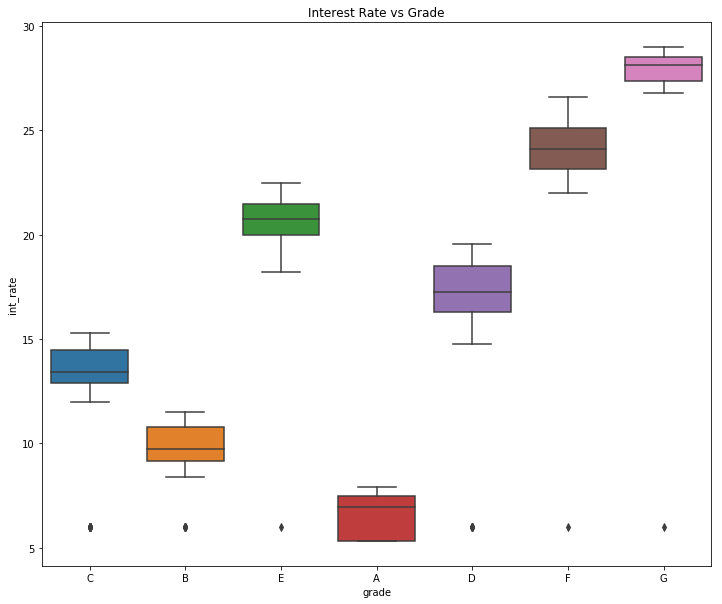

In [87]:
plt.figure(figsize=(12,10))
sns.boxplot(x="grade", y = "int_rate", data = df_select)
plt.title('Interest Rate vs Grade')

Text(0.5,1,'Annual Income vs Grade')

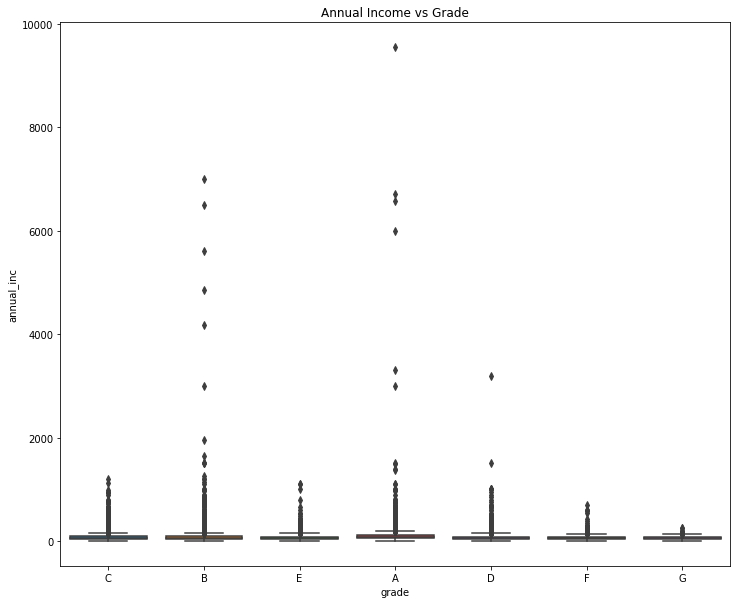

In [88]:
plt.figure(figsize=(12,10))
sns.boxplot(x="grade", y = "annual_inc", data = df_select)
plt.title('Annual Income vs Grade')

# Annual Income vs Interest Rate

In [95]:
# for index, rows in df_select.iterrows():
#     a = rows['int_rate']
#     #print (a)
#     if a >=25.0:
#         df_select['new_int_rate'] = 'abv 25%'
#     if a>=20 & a<

In [96]:
df_select['new_int_rate'] = pd.qcut(df_select['int_rate'], 5, labels=False)

In [97]:
df_select.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,new_int_rate
0,34000.000,60 months,15.310,814.410,C,MORTGAGE,150.000,Source Verified,Mar-2016,Current,n,debt_consolidation,140xx,NY,3
1,12200.000,60 months,11.470,268.130,B,RENT,90.000,Verified,Mar-2016,Current,n,debt_consolidation,773xx,TX,2
2,10000.000,36 months,11.470,329.620,B,RENT,35.000,Source Verified,Mar-2016,Current,n,other,913xx,CA,2
3,21000.000,36 months,11.470,692.200,B,MORTGAGE,175.000,Not Verified,Mar-2016,Current,n,home_improvement,481xx,MI,2
4,35000.000,60 months,21.180,950.420,E,MORTGAGE,195.000,Verified,Mar-2016,Fully Paid,n,debt_consolidation,871xx,NM,4


In [98]:
df_select['new_annual_inc'] = df_select['annual_inc']
a = np.percentile(df_select.new_annual_inc, 90)
df_select.new_annual_inc = np.where(df_select.new_annual_inc > a, a, df_select.new_annual_inc)

Text(0.5,1,'Annual Income vs Interest Rate')

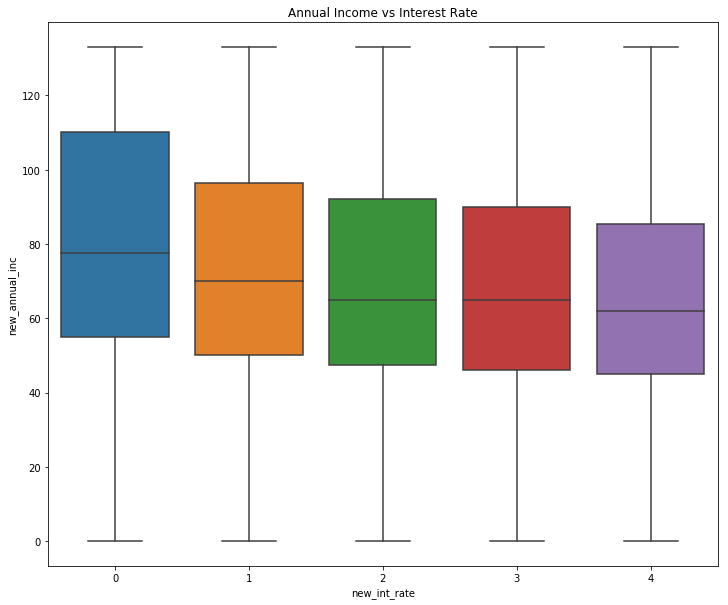

In [100]:
plt.figure(figsize=(12,10))
sns.boxplot(x="new_int_rate", y = "new_annual_inc", data = df_select)
plt.title('Annual Income vs Interest Rate')

# Verification Status vs Interest Rate

Text(0.5,1,'Verification Status vs Interest Rate')

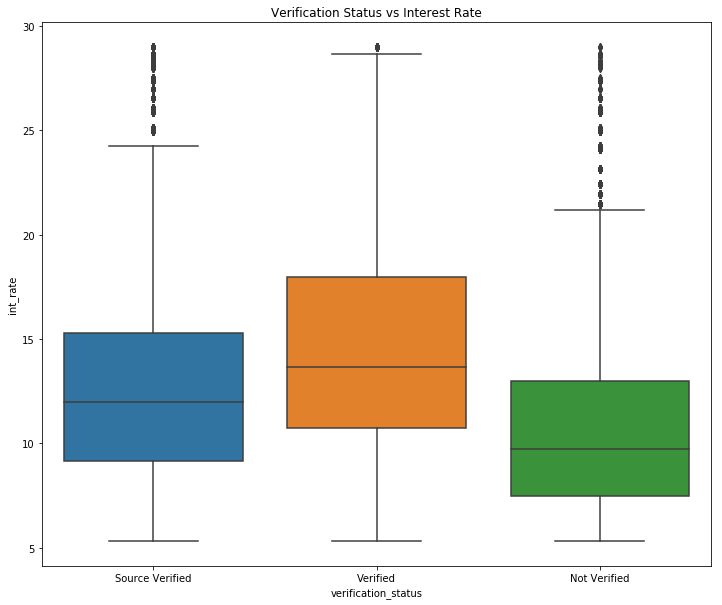

In [89]:
plt.figure(figsize=(12,10))
sns.boxplot(x="verification_status", y = "int_rate", data = df_select)
plt.title('Verification Status vs Interest Rate')

Text(0.5,1,'Home Ownership vs Interest Rate')

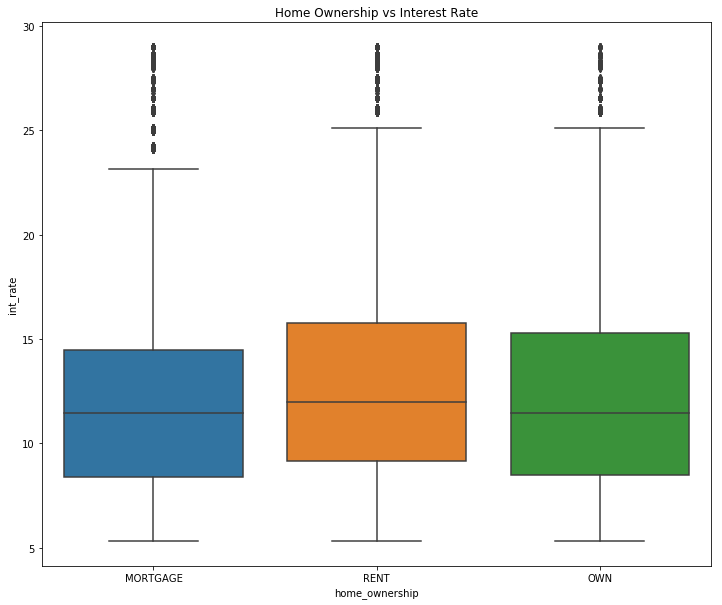

In [90]:
plt.figure(figsize=(12,10))
sns.boxplot(x="home_ownership", y = "int_rate", data = df_select)
plt.title('Home Ownership vs Interest Rate')

In [85]:
df_select.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state
0,34000.000,60 months,15.310,814.410,C,MORTGAGE,150.000,Source Verified,Mar-2016,Current,n,debt_consolidation,140xx,NY
1,12200.000,60 months,11.470,268.130,B,RENT,90.000,Verified,Mar-2016,Current,n,debt_consolidation,773xx,TX
2,10000.000,36 months,11.470,329.620,B,RENT,35.000,Source Verified,Mar-2016,Current,n,other,913xx,CA
3,21000.000,36 months,11.470,692.200,B,MORTGAGE,175.000,Not Verified,Mar-2016,Current,n,home_improvement,481xx,MI
4,35000.000,60 months,21.180,950.420,E,MORTGAGE,195.000,Verified,Mar-2016,Fully Paid,n,debt_consolidation,871xx,NM
